># **Data Visualization with Python (Part 1)** 



I will plot:
- Line Graph
- Area Plot (Cumulative plot or Stacked Line Plot)
- Histogram
- Bar Chart
- Pie Chart
- Box Plot
- Subplot
- Scatter Plot
- Bubble Plot
- Waffle Chart
- Regression Plot



My dataset contains information about Immigration to Canada from 1980 to 2013 - International migration flows to, and from selected countries and its format is .csv. The data is hosted on United Nation's website.

I've uploaded the dataset to Google Drive. 

*Let's get started!* 



In [ ]:
!pip install -q -U watermark

In [ ]:
%reload_ext watermark
%watermark -v -p numpy,pandas,scipy,seaborn,sklearn,matplotlib

Python implementation: CPython
Python version       : 3.7.14
IPython version      : 7.9.0

numpy     : 1.21.6
pandas    : 1.3.5
scipy     : 1.7.3
seaborn   : 0.11.2
sklearn   : 1.0.2
matplotlib: 3.2.2



In [ ]:
import os
import numpy as np
import pandas as pd
from tqdm import tqdm
import seaborn as sns
from pylab import rcParams
%matplotlib inline 
import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy import stats
import matplotlib.patches as mpatches
from PIL import Image
import folium

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!ls '/content/gdrive'

MyDrive


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/canada.csv',encoding = "ISO-8859-1")
df.head(2)

,Type,Coverage,OdName,AREA,AreaName,REG,RegName,DEV,DevName,1980,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
0,Immigrants,Foreigners,Afghanistan,935,Asia,5501,Southern Asia,902,Developing regions,16,...,2978,3436,3009,2652,2111,1746,1758,2203,2635,2004
1,Immigrants,Foreigners,Albania,908,Europe,925,Southern Europe,901,Developed regions,1,...,1450,1223,856,702,560,716,561,539,620,603


In [ ]:
df.shape

(196, 43)

>**Cleaning up data**


In [ ]:
#In pandas axis=0 represents rows (default) and axis=1 represents columns.

df.drop(['AREA','REG','DEV','Type','Coverage'], axis=1, inplace=True)

df.rename(columns={'OdName':'Country', 'AreaName':'Continent', 'RegName':'Region'}, inplace=True)

df.columns = list(map(str, df.columns))

# set the country name as index - useful for quickly looking up countries using .loc method
df.set_index('Country', inplace=True)

df['Total'] = df.sum(axis=1)

years = list(map(str, range(1980, 2014)))
print('data dimensions:', df.shape)


data dimensions: (196, 38)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  if sys.path[0] == '':


In [ ]:
df.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


>**Findig Missing Values**

In [ ]:
df.replace("?", np.NAN, inplace = True)
df.replace("*", np.NAN, inplace = True)


missing_data = df.isnull()
missing_data.tail()

for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("") 

Continent
False    196
Name: Continent, dtype: int64

Region
False    196
Name: Region, dtype: int64

DevName
False    196
Name: DevName, dtype: int64

1980
False    196
Name: 1980, dtype: int64

1981
False    196
Name: 1981, dtype: int64

1982
False    196
Name: 1982, dtype: int64

1983
False    196
Name: 1983, dtype: int64

1984
False    196
Name: 1984, dtype: int64

1985
False    196
Name: 1985, dtype: int64

1986
False    196
Name: 1986, dtype: int64

1987
False    196
Name: 1987, dtype: int64

1988
False    196
Name: 1988, dtype: int64

1989
False    196
Name: 1989, dtype: int64

1990
False    196
Name: 1990, dtype: int64

1991
False    196
Name: 1991, dtype: int64

1992
False    196
Name: 1992, dtype: int64

1993
False    196
Name: 1993, dtype: int64

1994
False    196
Name: 1994, dtype: int64

1995
False    196
Name: 1995, dtype: int64

1996
False    196
Name: 1996, dtype: int64

1997
False    196
Name: 1997, dtype: int64

1998
False    196
Name: 1998, dtype: int64

1999
False  

- *Based on the summary above, our data does not have any missing value.*

>**Plotting a Line Graph**
- I'm going to Plot a line graph of immigration from **United Kingdom** using **df.plot()**.

In [ ]:
#First, I will extract the data series for United Kingdom.
UK = df.loc['United Kingdom of Great Britain and Northern Ireland', years]
UK.head()

1980    22045
1981    24796
1982    20620
1983    10015
1984    10170
Name: United Kingdom of Great Britain and Northern Ireland, dtype: object

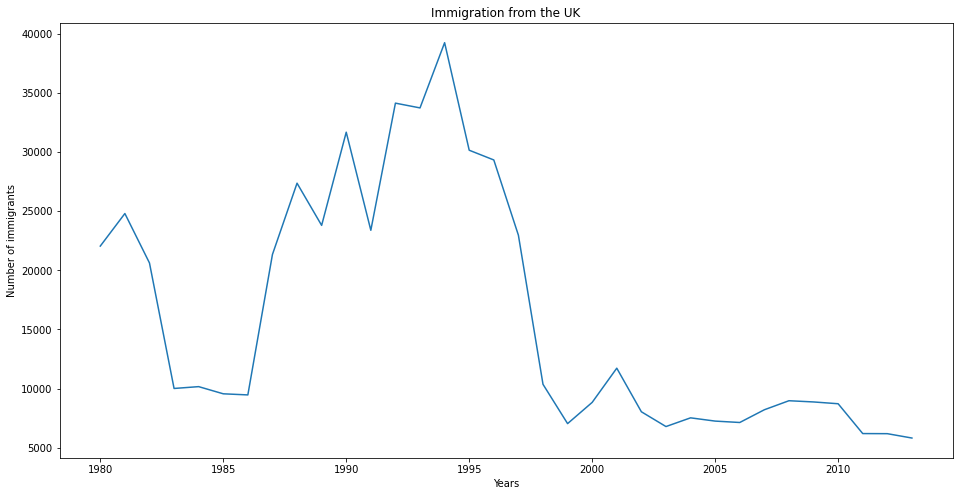

In [ ]:
#Next, I will plot a line plot by appending .plot() to the United Kingdom dataframe.
#Also, I want to label the x and y axis using plt.title(), plt.ylabel(), and plt.xlabel() as follows:

UK.index = UK.index.map(int) # let's change the index values of the UK to type integer for plotting
UK.plot(kind='line', figsize=(16, 8))

plt.title('Immigration from the UK')
plt.ylabel('Number of immigrants')
plt.xlabel('Years')

plt.show() 

Now we can compare the number of immigrants from the UK, United States of America and China from 1980 to 2013.

In [ ]:
df_UKUSCH = df.loc[['United Kingdom of Great Britain and Northern Ireland', 'United States of America', 'China'], years]
df_UKUSCH

,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013
Country,,,,,,,,,,,,,,,,,,,,,
United Kingdom of Great Britain and Northern Ireland,22045,24796,20620,10015,10170,9564,9470,21337,27359,23795,...,7533,7258,7140,8216,8979,8876,8724,6204,6195,5827
United States of America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,6990,8394,9613,9463,10190,8995,8142,7676,7891,8501
China,5123,6682,3308,1863,1527,1816,1960,2643,2758,4323,...,36619,42584,33518,27642,30037,29622,30391,28502,33024,34129


In [ ]:
#Since df_UKUSCH is a dataframe with the country as the index and years as the columns,
#we must first transpose the dataframe using transpose() method to swap the row and columns.

df_UKUSCH = df_UKUSCH.transpose()
df_UKUSCH .head()

Country,United Kingdom of Great Britain and Northern Ireland,United States of America,China
1980,22045,9378,5123
1981,24796,10030,6682
1982,20620,9074,3308
1983,10015,7100,1863
1984,10170,6661,1527


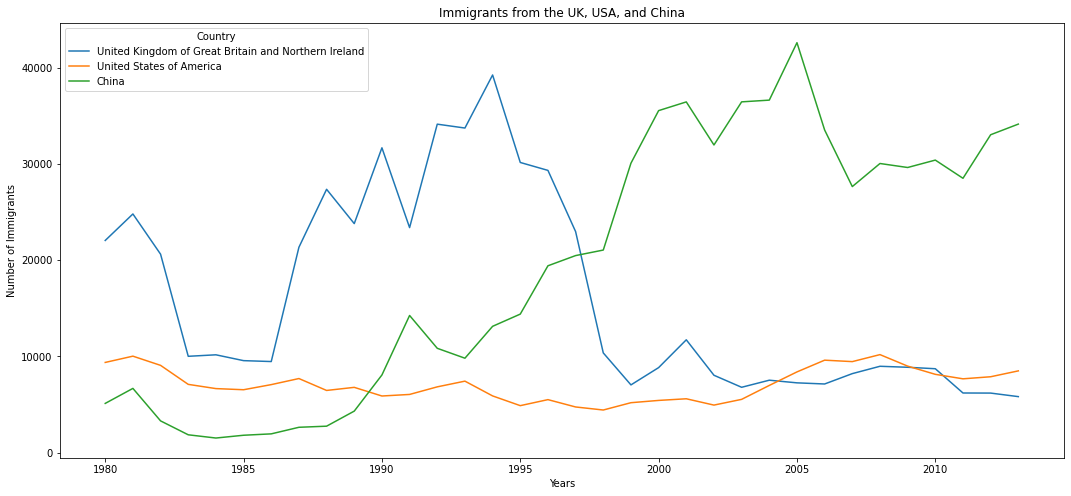

In [ ]:
# NOW, I need to change the index values of df_UKUSCH to type integer for plotting
df_UKUSCH.index = df_UKUSCH.index.map(int) 
df_UKUSCH.plot(kind='line', figsize=(18, 8)) 

plt.title('Immigrants from the UK, USA, and China')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

- Now I'm going to compare the trend of the top 5 countries that contributed the most to immigration to Canada.

In [ ]:
df.drop(['Unknown'], axis=0, inplace=True)
df.head(2)

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699


In [ ]:
#First, I must get the dataset, recall that I have already created a Total column that calculates cumulative immigration by country. 
#then I will sort on this column to get the top 5 countries using pandas sort_values() method.
# paramemter saves the changes to the original df dataframe.
inplace = True
df.sort_values(by='Total', ascending=False, axis=0, inplace=True)
df_top5 = df.head()
df_top5 = df_top5[years].transpose() 
print(df_top5)

Country  India  China  United Kingdom of Great Britain and Northern Ireland  \
1980      8880   5123                                              22045      
1981      8670   6682                                              24796      
1982      8147   3308                                              20620      
1983      7338   1863                                              10015      
1984      5704   1527                                              10170      
1985      4211   1816                                               9564      
1986      7150   1960                                               9470      
1987     10189   2643                                              21337      
1988     11522   2758                                              27359      
1989     10343   4323                                              23795      
1990     12041   8076                                              31668      
1991     13734  14255                               

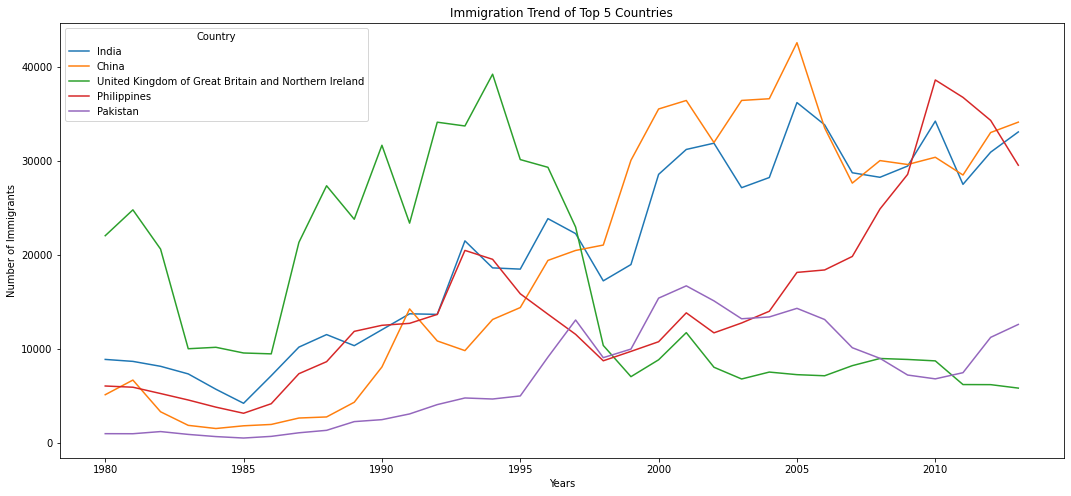

In [ ]:
#Second, I must plot the dataframe.
# let's change the index values of df_top5 to type integer for plotting
df_top5.index = df_top5.index.map(int)
# pass a tuple (x, y) size
df_top5.plot(kind='line', figsize=(18, 8)) 
  
plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')


plt.show()

- *As it is shown, I have created a line plot that visualized the top 5 countries that contributed the most immigrants to Canada, including India, China, the United Kingdom, Philippines, and Pakistan, respectively, between 1980 and 2013.*

>**Area Plots (*Cumulative plot or Stacked Line Plot*)**

 

- I'm going to visualize the top 5 countries as a cumulative plot.

In [ ]:
df.sort_values(['Total'], ascending=False, axis=0, inplace=True)

# get the top 5 entries
df_top5 = df.head()

# transpose the dataframe
df_top5 = df_top5[years].transpose()

df_top5.head()

Country,India,China,United Kingdom of Great Britain and Northern Ireland,Philippines,Pakistan
1980,8880,5123,22045,6051,978
1981,8670,6682,24796,5921,972
1982,8147,3308,20620,5249,1201
1983,7338,1863,10015,4562,900
1984,5704,1527,10170,3801,668


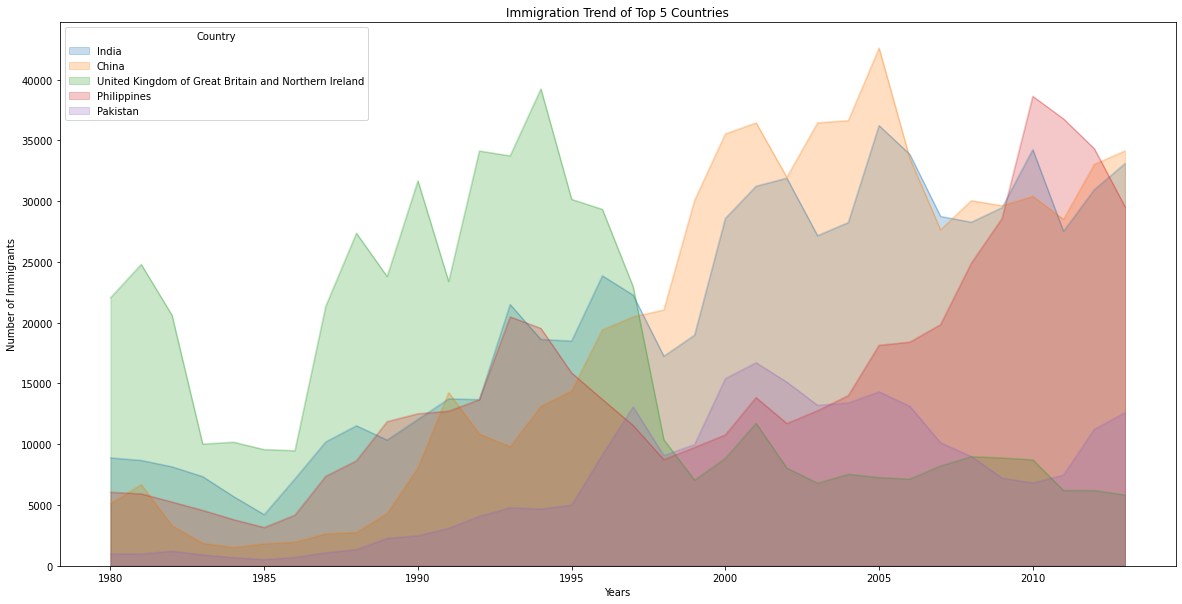

In [ ]:
#I set parameter stacked to value False to produce an unstacked plot.
#The unstacked plot has a default transparency (alpha value) at 0.5.
#I will modify this value by passing in the alpha parameter.
# let's change the index values of df_top5 to type integer for plotting
df_top5.plot(kind='area', 
             alpha=0.25,  # 0 - 1, default value alpha = 0.5
             stacked=False,
             figsize=(20, 10))   # pass a tuple (x, y) size

plt.title('Immigration Trend of Top 5 Countries')
plt.ylabel('Number of Immigrants')
plt.xlabel('Years')

plt.show()

>**Histograms (*representing the frequency distribution of numeric dataset*)**

- I'm giong to visualise the frequency distribution of the number of immigrants from the various countries to Canada in 2013?

In [ ]:
#y-axis is the frequency or the number of data points in each bin
# Viewing the 2013 data
df['2013'].head()

Country
India                                                   33087
China                                                   34129
United Kingdom of Great Britain and Northern Ireland     5827
Philippines                                             29544
Pakistan                                                12603
Name: 2013, dtype: int64

In [ ]:
# np.histogram returns 2 values
count, bin_edges = np.histogram(df['2013'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[178  11   1   2   0   0   0   0   1   2]
[    0.   3412.9  6825.8 10238.7 13651.6 17064.5 20477.4 23890.3 27303.2
 30716.1 34129. ]


- By default, the histrogram method breaks up the dataset into 10 bins. The figure below summarizes the bin ranges and the frequency distribution of immigration in 2013. It can be seen that in 2013:

    - 179 countries contributed between 0 to 3412.9 immigrants.
    - 11 countries contributed between 3412.9 to 6825.8 immigrants.
    - 1 country contributed between 6285.8 to 10238.7 immigrants, and so on.

- In the following plot, the x-axis represents the population range of immigrants in intervals of 3412.9. The y-axis represents the number of countries that contributed to the aforementioned population.

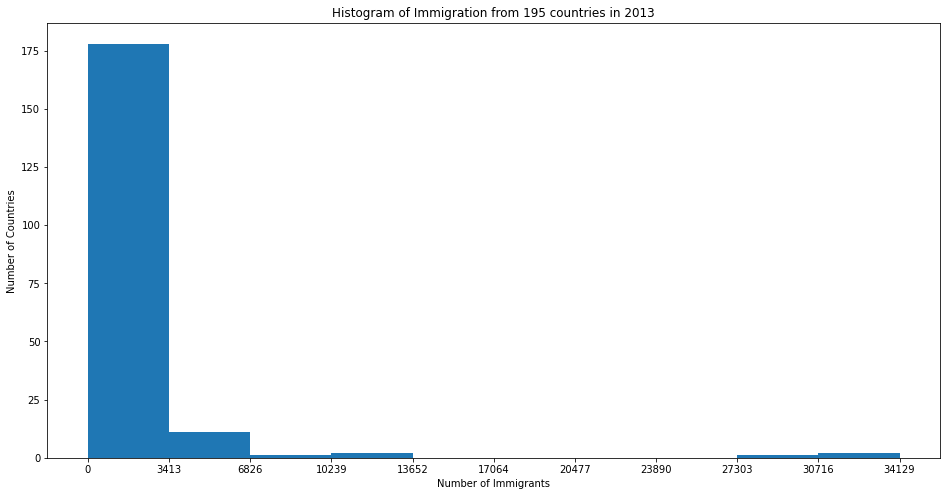

In [ ]:
# np.histogram returns 2 values
#'bin_edges' is a list of bin intervals
count, bin_edges = np.histogram(df['2013'])
#The x-axis labels can be matched with the bin size and will be fixed by:
#passing in a xticks keyword that contains the list of the bin sizes, as follows:
df['2013'].plot(kind='hist', figsize=(16, 8), xticks=bin_edges)

plt.title('Histogram of Immigration from 195 countries in 2013') # add a title to the histogram
plt.ylabel('Number of Countries') # add y-label
plt.xlabel('Number of Immigrants') # add x-label

plt.show()

Now I'm going to plot immigration distribution for the UK, USA, and China for years 1980 - 2013?

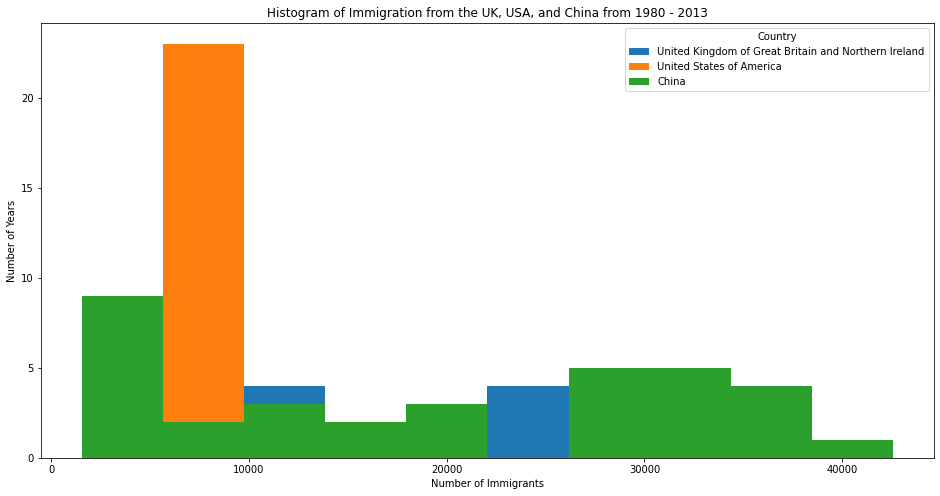

In [ ]:
#First, I will transpose dataframe
df_t = df.loc[['United Kingdom of Great Britain and Northern Ireland', 'United States of America', 'China'], years].transpose()
count, bin_edges = np.histogram(df_t, 15)
# Second, I will generate histogram
df_t.plot(kind='hist', figsize=(16, 8))

plt.title('Histogram of Immigration from the UK, USA, and China from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

- I'm going to make a few modifications to improve the impact and aesthetics of the previous plot:

   - Increase the bin size to 15 by passing in bins parameter;
   - Set transparency to 60% by passing in alpha parameter;
   - Label the x-axis by passing in x-label parameter;
   - Change the colors of the plots by passing in color parameter.

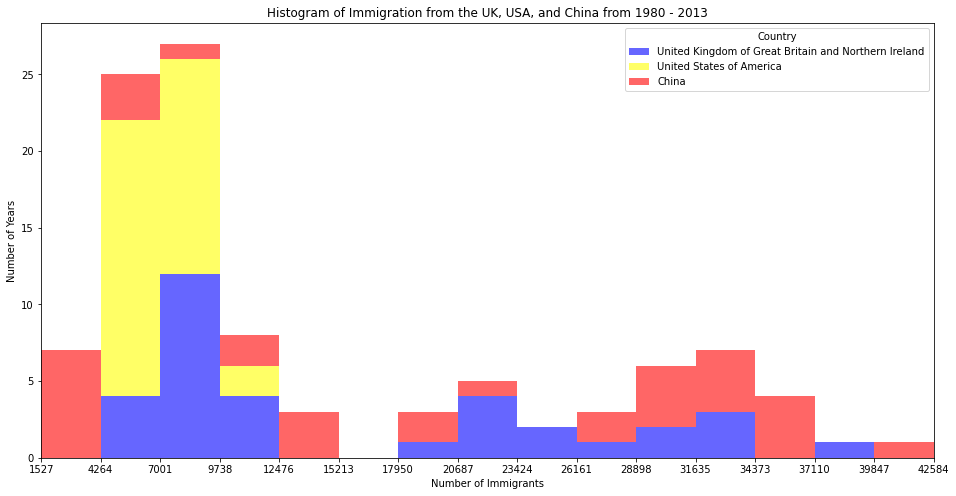

In [ ]:
#I do not want the plots overlap each other:
#I must stack them using the stacked parameter.
#Let's also adjust the min and max x-axis labels to remove the extra gap on the edges of the plot.
#I need to pass a tuple (min,max) using the xlim paramater.

# let's get the x-tick values
count, bin_edges = np.histogram(df_t, 15)
xmin = bin_edges[0] - 10   #  first bin value is 31.0, adding buffer of 10 for aesthetic purposes 
xmax = bin_edges[-1] + 10  #  last bin value is 308.0, adding buffer of 10 for aesthetic purposes

#stacked Histogram
df_t.plot(kind ='hist', 
          figsize=(16, 8),
          bins=15,
          alpha=0.6,
          xticks=bin_edges,
          color=['blue', 'yellow', 'red'],
          stacked=True,
          xlim=(xmin, xmax)
         )

plt.title('Histogram of Immigration from the UK, USA, and China from 1980 - 2013')
plt.ylabel('Number of Years')
plt.xlabel('Number of Immigrants')

plt.show()

In [ ]:
#For a full listing of colors available in Matplotlib:
#import matplotlib
#for name, hex in matplotlib.colors.cnames.items():
 #   print(name, hex)

>**Bar Charts or Dataframe (representing numerical and categorical variables grouped in intervals)**

- Just a Note: 
  - kind=bar creates a vertical bar plot
  - kind=barh creates a horizontal bar plot

>**Vertical bar plot**

- I'm going to analyze the effect of the war in Iraq:  
The 2003 - 2011 war was a major economic and political event in Iraq, and a high percentage of the population have been forced to flee. 
- I'm going to compare the number of Iraqi immigrants (country = 'Iraq') to Canada from 1980 to 2013.

In [ ]:
# I need to get the data
df_Iraq= df.loc['Iraq', years]
df_Iraq.head()

1980    262
1981    245
1982    260
1983    380
1984    428
Name: Iraq, dtype: object

I will annotate this on the plot using the *annotate method* of the scripting layer or the pyplot interface. To make sure that I rememeber the details later on ;), I am going to explain the parameters that  pass in as following:

- s: str, the text of annotation.
- xy: Tuple specifying the (x,y) point to annotate (in this case, end point of arrow).
- xytext: Tuple specifying the (x,y) point to place the text (in this case, start point of arrow).
- xycoords: The coordinate system that xy is given in - 'data' uses the coordinate system of the object being annotated (default).
- arrowprops: Takes a dictionary of properties to draw the arrow:
    - rrowstyle: Specifies the arrow style, '->' is standard arrow.
    - connectionstyle: Specifies the connection type. arc3 is a straight line.
    - color: Specifies color of arrow.
    - lw: Specifies the line width.

- I will also annotate a text to go over the arrow. We will pass in the following additional parameters:

  - rotation: rotation angle of text in degrees (counter clockwise)
  -  va: vertical alignment of text [‘center’ | ‘top’ | ‘bottom’ | ‘baseline’]
  - ha: horizontal alignment of text [‘center’ | ‘right’ | ‘left’]

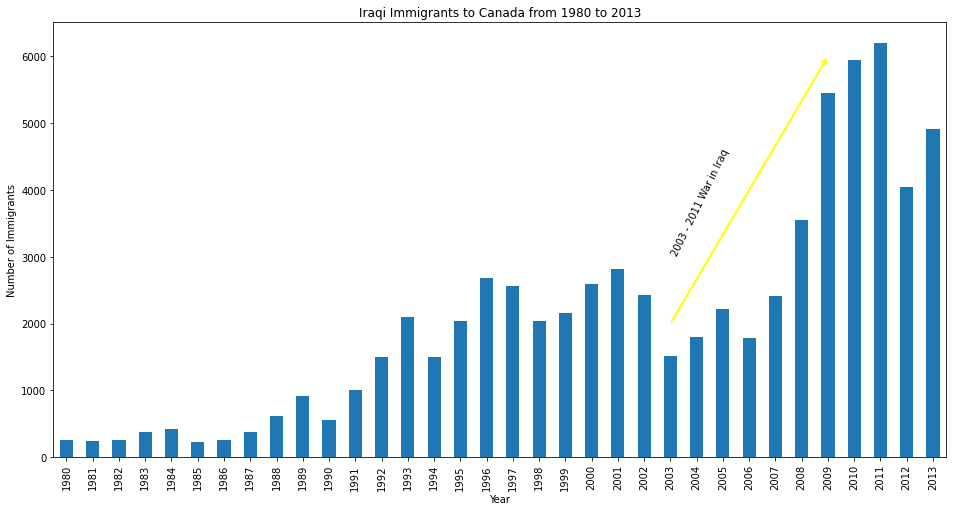

In [ ]:
# I will plot data
df_Iraq.plot(kind='bar', figsize=(16, 8), rot=90)

plt.xlabel('Year')
plt.ylabel('Number of Immigrants')
plt.title('Iraqi Immigrants to Canada from 1980 to 2013')

# Annotate arrow
plt.annotate('',  # s: str. will leave it blank for no text
             xy=(29, 6000),  # place head of the arrow at point (year 2009 , pop 6000)
             xytext=(23, 2000),  # place base of the arrow at point (year 2003 , pop 2000)
             xycoords='data',  # will use the coordinate system of the object being annotated
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3', color='yellow', lw=2)
             )

# Annotate Text
plt.annotate('2003 - 2011 War in Iraq',  # text to display
             xy=(23, 3000),  # start the text at point (year 2003 , pop 3000)
             rotation=64,  # based on trial and error to match the arrow
             va='bottom',  # want the text to be vertically 'bottom' aligned
             ha='left',  # want the text to be horizontally 'left' algned.
             )

plt.show()

The bar plot above shows the total number of immigrants broken down by each year. We can clearly see the impact of the War; the number of immigrants from Iraq to Canada started increasing rapidly after 2003.

>**Horizontal Bar Plot**

- I'm going to create a horizontal bar plot showing the total number of immigrants to Canada from the top 15 countries between 1980 and  2013. Then I will label each country with the total immigrant count.



- I need more room for labelling the bar. In horizontal bar graphs, the y-axis is used for labelling, and the length of bars on the x-axis corresponds to the magnitude of the variable being measured. 




In [ ]:
#First, I must get the data pertaining to the top 15 countries.
# sort dataframe on 'Total' column (descending)
df.sort_values(by='Total', ascending=True, inplace=True)

# I will get top 15 countries
df_top15 = df['Total'].tail(15)
df_top15

Country
Romania                                                  93585
Viet Nam                                                 97146
Jamaica                                                 106431
France                                                  109091
Lebanon                                                 115359
Poland                                                  139241
Republic of Korea                                       142581
Sri Lanka                                               148358
Iran (Islamic Republic of)                              175923
United States of America                                241122
Pakistan                                                241600
Philippines                                             511391
United Kingdom of Great Britain and Northern Ireland    551500
China                                                   659962
India                                                   691904
Name: Total, dtype: int64

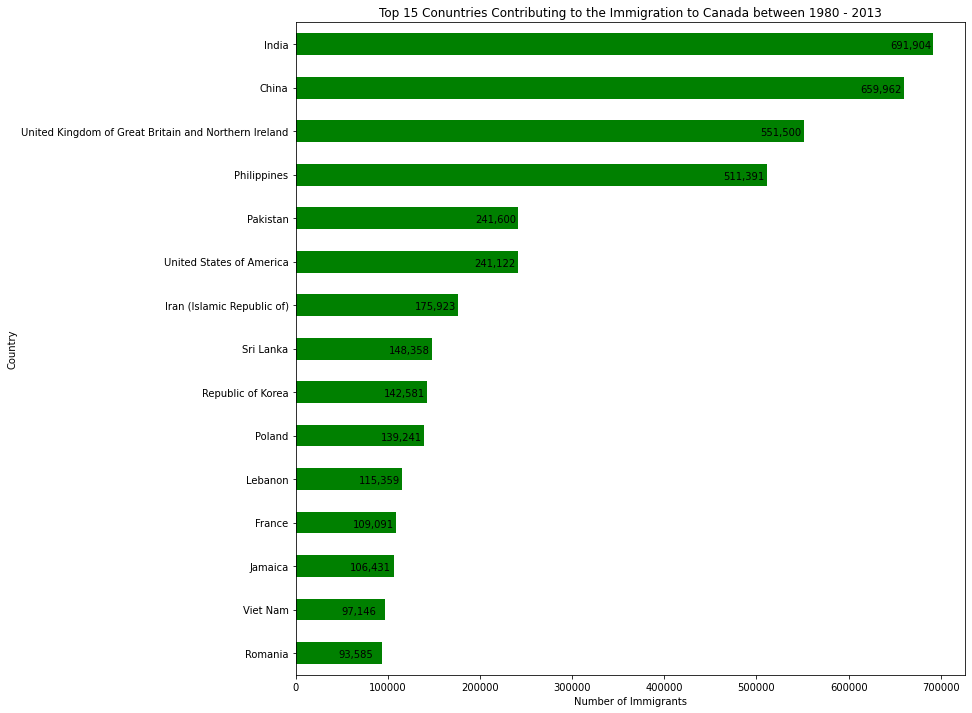

In [ ]:
#generate plot
df_top15.plot(kind='barh', figsize=(12, 12), color='green')
plt.xlabel('Number of Immigrants')
plt.title('Top 15 Conuntries Contributing to the Immigration to Canada between 1980 - 2013')

    # annotate value labels to each country
for index, value in enumerate(df_top15): 
    label = format(int(value), ',') # format int with commas
    
    # place text at the end of bar (subtracting 47000 from x, and 0.1 from y to make it fit within the bar)
    plt.annotate(label, xy=(value - 47000, index - 0.10), color='black')

plt.show()

>**Pie Charts**

- I will apply a pie chart to explore the proportion of the immigrants grouped by continents for the entire time period from 1980 to 2013.

- I need to gather data.
The general process of groupby involves the following steps:

   - Split: Splitting the data into groups based on some criteria.
   - Apply: Applying a function to each group independently: . sum() .count() .mean() .std() .aggregate() .apply() .etc..
   - Combine: Combining the results into a data structure.

In [ ]:
# group countries by continents and apply sum() function 
df_continents = df.groupby('Continent', axis=0).sum()

# note: the output of the groupby method is a `groupby' object. 
# I can not use it further until I apply a function (eg .sum())
print(type(df.groupby('Continent', axis=0)))

df_continents.head(6)

<class 'pandas.core.groupby.generic.DataFrameGroupBy'>


,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Continent,,,,,,,,,,,,,,,,,,,,,
Africa,3951,4363,3819,2671,2639,2650,3782,7494,7552,9894,...,27523,29188,28284,29890,34534,40892,35441,38083,38543,618948
Asia,31025,34314,30214,24696,27274,23850,28739,43203,47454,60256,...,159253,149054,133459,139894,141434,163845,146894,152218,155075,3317794
Europe,39760,44802,42720,24638,22287,20844,24370,46698,54726,60893,...,35955,33053,33495,34692,35078,33425,26778,29177,28691,1410947
Latin America and the Caribbean,13081,15215,16769,15427,13678,15171,21179,28471,21924,25060,...,24747,24676,26011,26547,26867,28818,27856,27173,24950,765148
Northern America,9378,10030,9074,7100,6661,6543,7074,7705,6469,6790,...,8394,9613,9463,10190,8995,8142,7677,7892,8503,241142
Oceania,1942,1839,1675,1018,878,920,904,1200,1181,1539,...,1585,1473,1693,1834,1860,1834,1548,1679,1775,55174


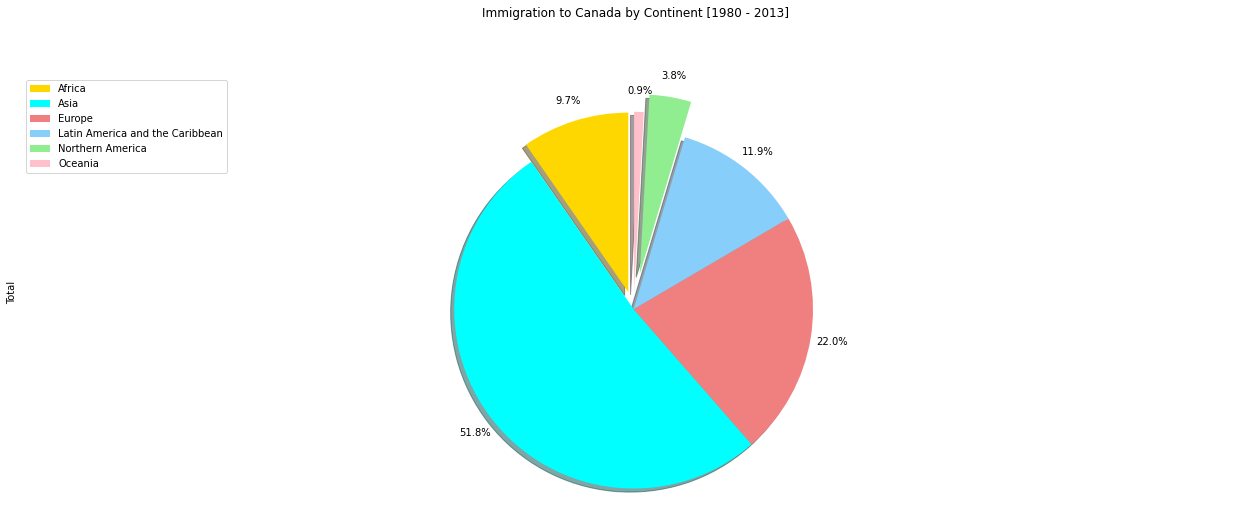

In [ ]:
#Now, I must plot the data.
colors_list = ['gold', 'cyan', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.1, 0, 0, 0, 0.2, 0.1] # ratio for each continent with which to offset each wedge.

df_continents['Total'].plot(kind='pie',
                            figsize=(22, 8),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,         # turn off labels on pie chart
                            pctdistance=1.12,    # the ratio between the center of each pie slice and the start of the text generated by autopct 
                            colors=colors_list,  # add custom colors
                            explode= explode_list)




# scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent [1980 - 2013]', y=1.12) 

plt.axis('equal') 

# add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

- Now, I want to use a pie chart to compare the percentage of new immigrants grouped by continents in the year 2013 and 1980.

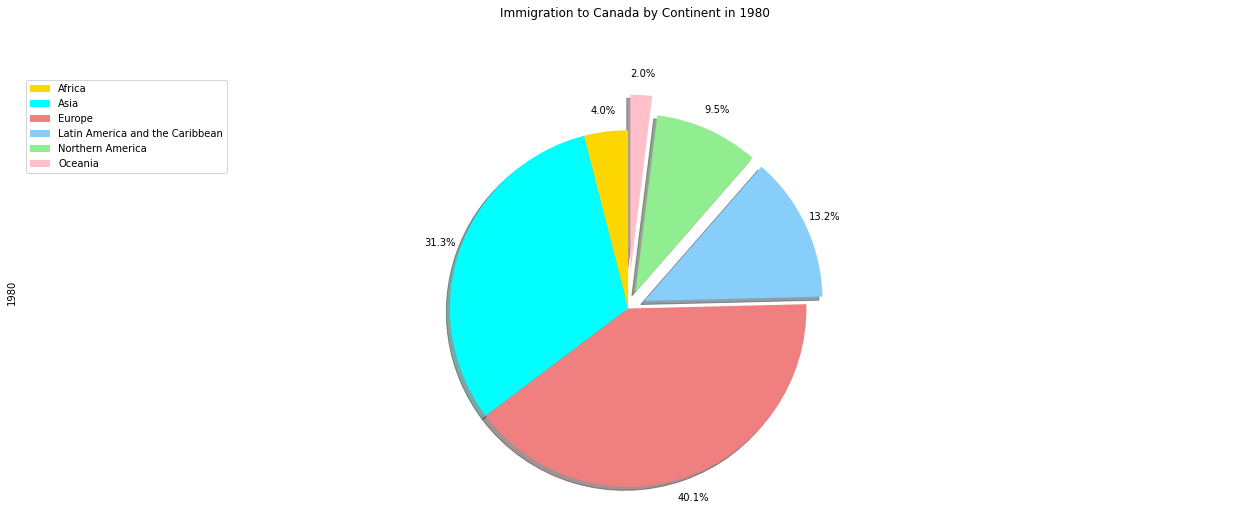

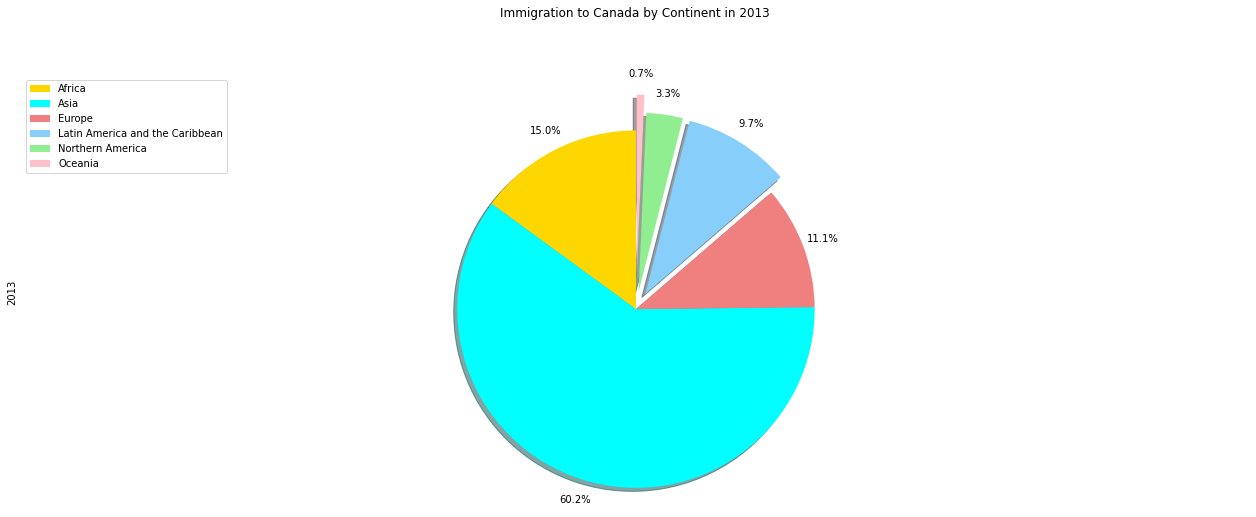

In [ ]:
#1980
colors_list = ['gold', 'cyan', 'lightcoral', 'lightskyblue', 'lightgreen', 'pink']
explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2] # ratio for each continent with which to offset each wedge.

df_continents['1980'].plot(kind='pie',
                            figsize=(22, 8),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                 # turn off labels on pie chart
                            pctdistance=1.12,  # the ratio between the pie center and start of text label
                            colors=colors_list,          
                            explode= explode_list         # 'explode' lowest 3 continents
                            )

#scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent in 1980', y=1.12) 
plt.axis('equal') 

#I must add legend
plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()


#2013
explode_list = [0.0, 0, 0, 0.1, 0.1, 0.2] # ratio for each continent with which to offset each wedge.

df_continents['2013'].plot(kind='pie',
                            figsize=(22, 8),
                            autopct='%1.1f%%', 
                            startangle=90,    
                            shadow=True,       
                            labels=None,                 # turn off labels on pie chart
                            pctdistance=1.12,            # the ratio between the pie center and start of text label
                            colors=colors_list, 
                            explode= explode_list         # 'explode' lowest 3 continents
                            )

#scale the title up by 12% to match pctdistance
plt.title('Immigration to Canada by Continent in 2013', y=1.12) 
plt.axis('equal') 

plt.legend(labels=df_continents.index, loc='upper left') 

plt.show()

> **Box Plots (*representing the distribution of the data through five main dimensions*)**

- I want to plot the box plot for the Colombians immigrants between 1980 - 2013.

In [ ]:
# I need to place extra square brackets around 'Colombia'to get a dataframe, .
df_Colombia = df.loc[['Colombia'], years].transpose()
df_Colombia.head()

Country,Colombia
1980,266
1981,326
1982,360
1983,244
1984,235


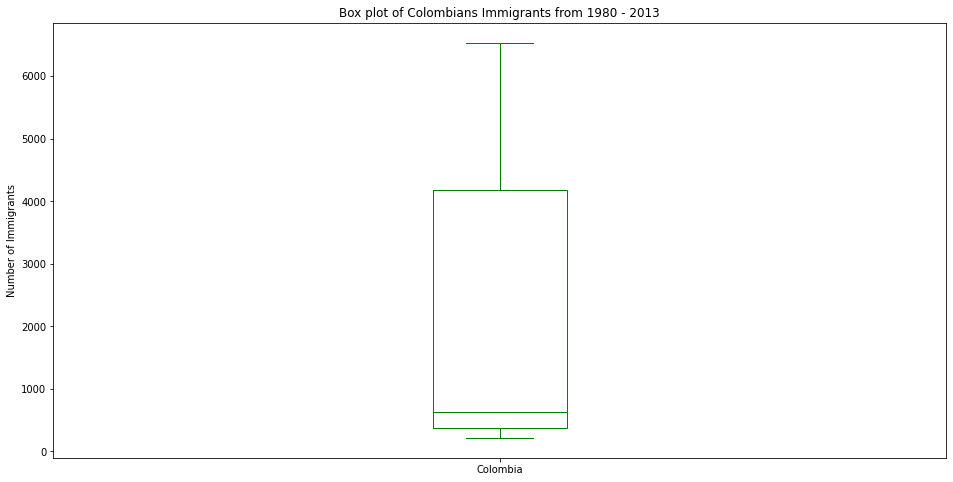

In [ ]:
df_Colombia.plot(kind='box', figsize=(16, 8), color='green')

plt.title('Box plot of Colombians Immigrants from 1980 - 2013')
plt.ylabel('Number of Immigrants')

plt.show()

- As it can be seen:

    - The minimum number of immigrants is around 200 (min), maximum number is around 7000 (max), and median number of immigrants is around 500 (median).
    - 25% of the years for period 1980 - 2013 had an annual immigrant count of 400 or fewer (First quartile).
    - 75% of the years for period 1980 - 2013 had an annual immigrant count of 4000 or fewer (Third quartile).


In [ ]:
#Viewing the actual numbers by calling the describe() method on the dataframe.
df_Colombia.describe()

Country,Colombia
count,34.000000
mean,2120.235294
std,2163.761316
min,214.000000
25%,372.000000
50%,633.000000
75%,4173.750000
max,6535.000000


- Now, I want to compare the distribution of the number of new immigrants from the Pakistan, USA, and India for the period 1980 - 2013.

In [ ]:
df_PUI = df.loc[['Pakistan', 'United States of America', 'India'], years].transpose()
df_PUI.head()

Country,Pakistan,United States of America,India
1980,978,9378,8880
1981,972,10030,8670
1982,1201,9074,8147
1983,900,7100,7338
1984,668,6661,5704


In [ ]:
df_PUI.describe()

Country,Pakistan,United States of America,India
count,34.000000,34.000000,34.000000
mean,7105.882353,7091.823529,20350.117647
std,5315.849587,1648.017054,10007.342579
min,514.000000,4437.000000,4211.000000
25%,1565.750000,5676.000000,10637.750000
50%,7014.000000,6916.000000,20235.000000
75%,12259.000000,8331.000000,28699.500000
max,16708.000000,10190.000000,36210.000000


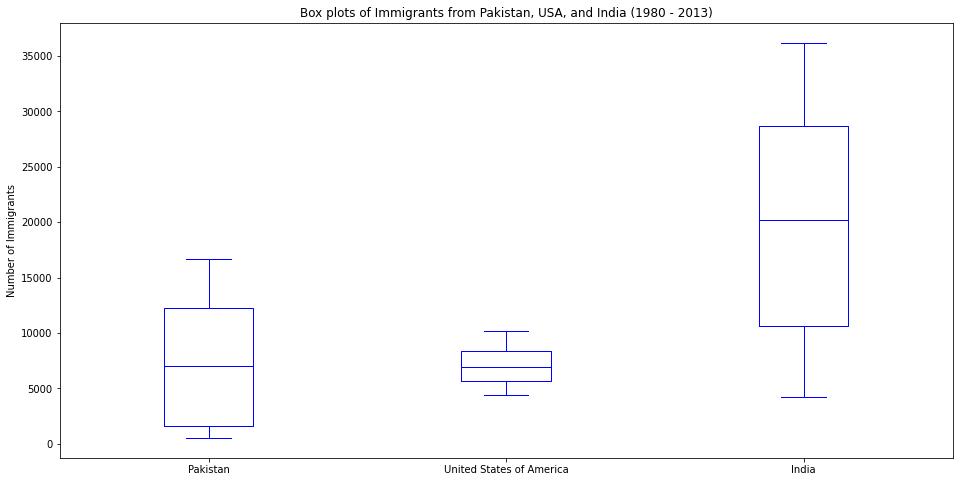

In [ ]:
df_PUI.plot(kind='box', figsize=(16, 8), color='blue')

plt.title('Box plots of Immigrants from Pakistan, USA, and India (1980 - 2013)')
plt.ylabel('Number of Immigrants')

plt.show()

We can observe that, while Pakistan and the USA have around the same median immigrant population (~7500), the median immigrant population of India is about 20,000, and its immigrant population range is more spread out than two other countries. The maximum population from India for any year  is around 35,000 whereas the maximum population from Pakistan and the USA have been less then around 17,000.

>**Subplots**

- I want to perform a side by side comparison of the box plot with the line plot of Pakistan, the USA, and India immigration.
- (NOTE: With subplots, we usually work with the artist layer instead of the scripting layer.



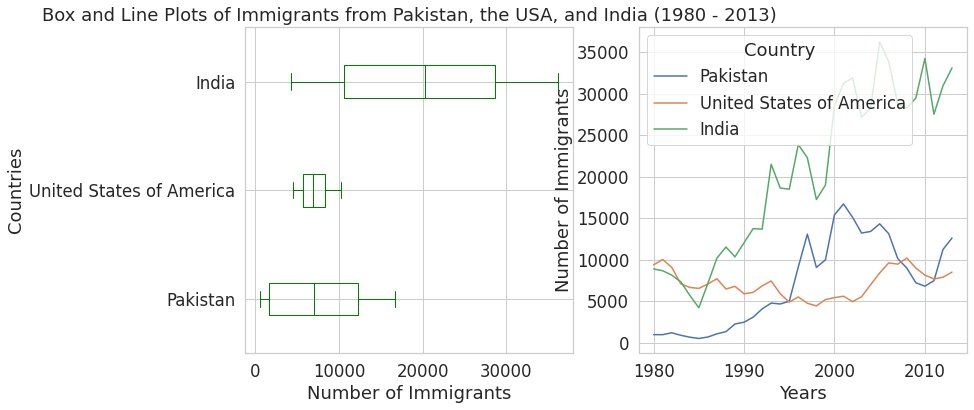

In [ ]:
fig = plt.figure() # create figure

ax0 = fig.add_subplot(1, 3, 1) # add subplot 1 (1 row, 3 columns, first plot)
ax1 = fig.add_subplot(1, 3, 2) # add subplot 2 (1 row, 3 columns, second plot). 

# Subplot 1: Box plot
df_PUI.plot(kind='box', color='green', vert=False, figsize=(20, 6), ax=ax0) # add to subplot 1
ax0.set_title('Box and Line Plots of Immigrants from Pakistan, the USA, and India (1980 - 2013)')
ax0.set_xlabel('Number of Immigrants')
ax0.set_ylabel('Countries')




# Subplot 2: Line plot
df_PUI.plot(kind='line', figsize=(20, 6), ax=ax1) # add to subplot 2
#ax1.set_title ('Line Plots of Immigrants from Pakistan,the USA, and India (1980 - 2013)')
ax1.set_ylabel('Number of Immigrants')
ax1.set_xlabel('Years')

plt.show()

- Now I want to create a box plot to visualize the distribution of the top 15 countries (based on total immigration) grouped by the decades 1980s, 1990s, and 2000s.

In [ ]:
#I must get the dataset of the top 15 countries based on Total immigrant population. 
#Name the dataframe df_top15.
df_top15 = df.sort_values(['Total'], ascending=False, axis=0).head(15)
df_top15

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
India,Asia,Southern Asia,Developing regions,8880,8670,8147,7338,5704,4211,7150,...,36210,33848,28742,28261,29456,34235,27509,30933,33087,691904
China,Asia,Eastern Asia,Developing regions,5123,6682,3308,1863,1527,1816,1960,...,42584,33518,27642,30037,29622,30391,28502,33024,34129,659962
United Kingdom of Great Britain and Northern Ireland,Europe,Northern Europe,Developed regions,22045,24796,20620,10015,10170,9564,9470,...,7258,7140,8216,8979,8876,8724,6204,6195,5827,551500
Philippines,Asia,South-Eastern Asia,Developing regions,6051,5921,5249,4562,3801,3150,4166,...,18139,18400,19837,24887,28573,38617,36765,34315,29544,511391
Pakistan,Asia,Southern Asia,Developing regions,978,972,1201,900,668,514,691,...,14314,13127,10124,8994,7217,6811,7468,11227,12603,241600
United States of America,Northern America,Northern America,Developed regions,9378,10030,9074,7100,6661,6543,7074,...,8394,9613,9463,10190,8995,8142,7676,7891,8501,241122
Iran (Islamic Republic of),Asia,Southern Asia,Developing regions,1172,1429,1822,1592,1977,1648,1794,...,5837,7480,6974,6475,6580,7477,7479,7534,11291,175923
Sri Lanka,Asia,Southern Asia,Developing regions,185,371,290,197,1086,845,1838,...,4930,4714,4123,4756,4547,4422,3309,3338,2394,148358
Republic of Korea,Asia,Eastern Asia,Developing regions,1011,1456,1572,1081,847,962,1208,...,5832,6215,5920,7294,5874,5537,4588,5316,4509,142581


In [ ]:
#I will Creat3 a new dataframe which contains the aggregate for each decade:
#the, I must create a list of all years in decades 80's, 90's, and 00's
years_80s = list(map(str, range(1980, 1990))) 
years_90s = list(map(str, range(1990, 2000))) 
years_00s = list(map(str, range(2000, 2010))) 

# slice the original dataframe df_can to create a series for each decade
df_80s = df_top15.loc[:, years_80s].sum(axis=1) 
df_90s = df_top15.loc[:, years_90s].sum(axis=1) 
df_00s = df_top15.loc[:, years_00s].sum(axis=1)

# merge the three series into a new data frame
new_df = pd.DataFrame({'1980s': df_80s, '1990s': df_90s, '2000s':df_00s}) 

# display dataframe
new_df.head()


,1980s,1990s,2000s
Country,,,
India,82154,180395,303591
China,32003,161528,340385
United Kingdom of Great Britain and Northern Ireland,179171,261966,83413
Philippines,60764,138482,172904
Pakistan,10591,65302,127598


In [ ]:
new_df.describe()

,1980s,1990s,2000s
count,15.000000,15.000000,15.000000
mean,44418.333333,85594.666667,97471.533333
std,44190.676455,68237.560246,100583.204205
min,7613.000000,30028.000000,13629.000000
25%,16698.000000,39259.000000,36101.500000
50%,30638.000000,56915.000000,65794.000000
75%,59183.000000,104451.500000,105505.500000
max,179171.000000,261966.000000,340385.000000


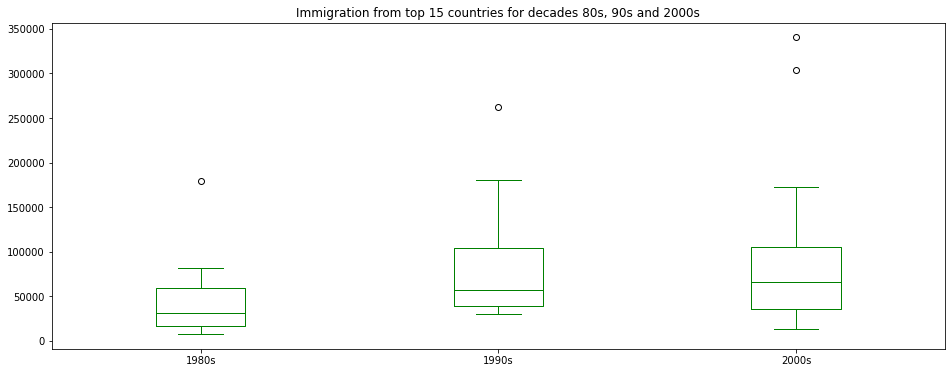

In [ ]:
new_df.plot(kind='box', figsize=(16, 6), color= 'green')
plt.title('Immigration from top 15 countries for decades 80s, 90s and 2000s')
plt.show()

I will figure out how the box plot differs from the summary table created. The box plot scans the data and identifies the outliers. In order to be an outlier, the data value must be:

larger than Q3 by at least 1.5 times the interquartile range (IQR), or,

smaller than Q1 by at least 1.5 times the IQR. Let's look at decade 2000s as an example:

- Q1 (25%) = 39,259.0

- Q3 (75%) = 104,451.5

- IQR = Q3 - Q1 = 65,192.5

Using the definition of outlier, any value that is greater than Q3 by 1.5 times IQR will be flagged as outlier.

- Outlier > 104,451.5 + (1.5 * 65,192.5)

- Outlier > 202,240.25

In [ ]:
# let's check how many entries fall above the outlier threshold 
new_df=new_df.reset_index()
new_df[new_df['2000s']> 209611.5]

,Country,1980s,1990s,2000s
0,India,82154,180395,303591
1,China,32003,161528,340385


- China and India are both considered as outliers since their population for the decade exceeds 209,611.5.

>**Scatter Plots**

- I will visualize the trend of total immigrantion to Canada (all countries combined) using a scatter plot for the years 1980 - 2013.

In [ ]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df[years].sum(axis=0))
#Since I am expecting to use the relationship betewen years and total population, I will convert years to int type.
df_tot.index = map(int, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace = True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980,99137
1,1981,110563
2,1982,104271
3,1983,75550
4,1984,73417


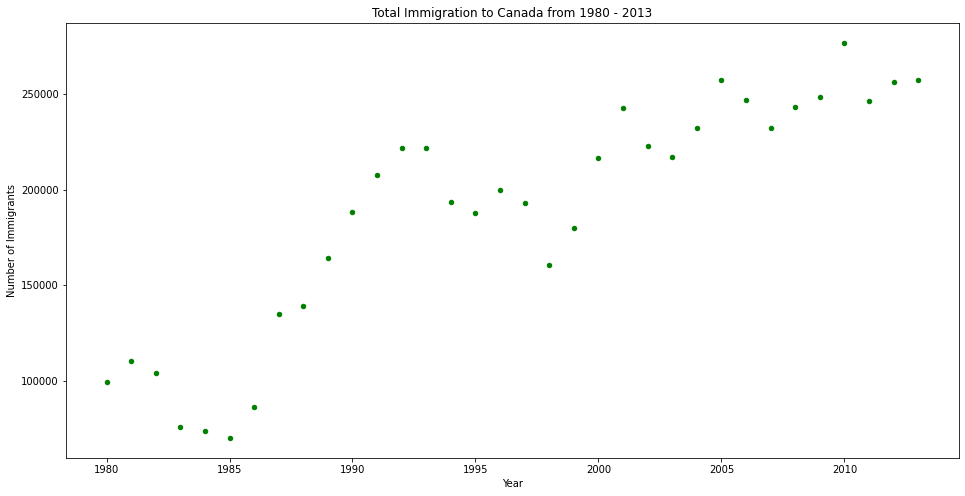

In [ ]:
df_tot.plot(kind='scatter', x='year', y='total', figsize=(16, 8), color='green')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()

- It is clear that when the years go by, the total number of immigrants increases. I can mathematically analyze this upward trend using a regression line (line of best fit).

I will plot a linear line of best fit, and use it to predict the number of immigrants in 2015.

Step 1: Get the equation of line of best fit. We will use Numpy's polyfit() method by passing in the following:



In [ ]:
#x: x-coordinates of the data.
#y: y-coordinates of the data.
#deg: Degree of fitting polynomial. 1 = linear, 2 = quadratic, and so on.

x = df_tot['year']      # year on x-axis
y = df_tot['total']     # total on y-axis
fit = np.polyfit(x, y, deg=1)

fit

array([ 5.56709228e+03, -1.09261952e+07])

-The output is an array with the polynomial coefficients, highest powers first. Since we are plotting a linear regression y= a * x + b, our output has 2 elements [5.56709228e+03, -1.09261952e+07] with the the slope in position 0 and intercept in position 1.

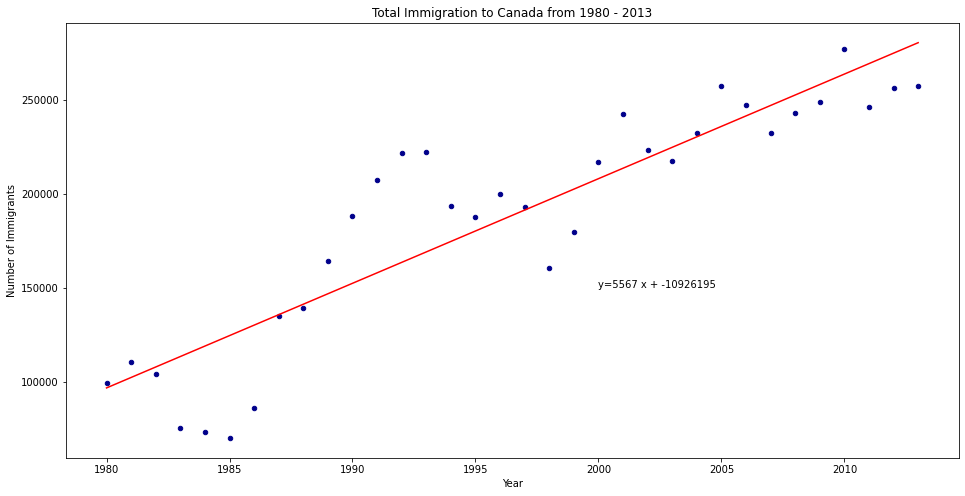

'No. Immigrants = 5567 * Year + -10926195'

In [ ]:
#Plotting the regression line on the scatter plot.
df_tot.plot(kind='scatter', x='year', y='total', figsize=(16, 8), color='darkblue')

plt.title('Total Immigration to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color='red') # recall that x is the Years
plt.annotate('y={0:.0f} x + {1:.0f}'.format(fit[0], fit[1]), xy=(2000, 150000))

plt.show()

# print out the line of best fit
'No. Immigrants = {0:.0f} * Year + {1:.0f}'.format(fit[0], fit[1]) 

- sing the equation of line of best fit, we can estimate the number of immigrants in 2015:

   - No. Immigrants = 5567 * Year - 10926195
   - No. Immigrants = 5567 * 2015 - 10926195
   - No. Immigrants = 291,310

When compared to the actual from Citizenship and Immigration Canada's (CIC) 2016 Annual Report, we see that Canada accepted 271,845 immigrants in 2015. Our estimated value of 291,310 is within 7% of the actual number, which is pretty good considering our original data came from United Nations.

As we can see that immigration took a dip around 1993 - 1997. Further analysis into the topic revealed that in 1993 Canada introcuded Bill C-86 which introduced revisions to the refugee determination system, mostly restrictive. Further amendments to the Immigration Regulations cancelled the sponsorship required for "assisted relatives" and reduced the points awarded to them, making it more difficult for family members (other than nuclear family) to immigrate to Canada. These restrictive measures had a direct impact on the immigration numbers for the next several years.

I'm going to create a scatter plot of the total immigration from The **Malaysia**, **Italy**, and **Ireland** to **Canada** from **1980 to 2013**?

In [ ]:
### type your answer here

# create df_countries dataframe
df_countries = df.loc[['Malaysia', 'Italy', 'Ireland'], years].transpose()

# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))

# reset index in place
df_total.reset_index(inplace=True)

# rename columns
df_total.columns = ['year', 'total']

# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)

# show resulting dataframe
df_total.head()

,year,total
0,1980,3387
1,1981,3768
2,1982,3000
3,1983,1566
4,1984,1569


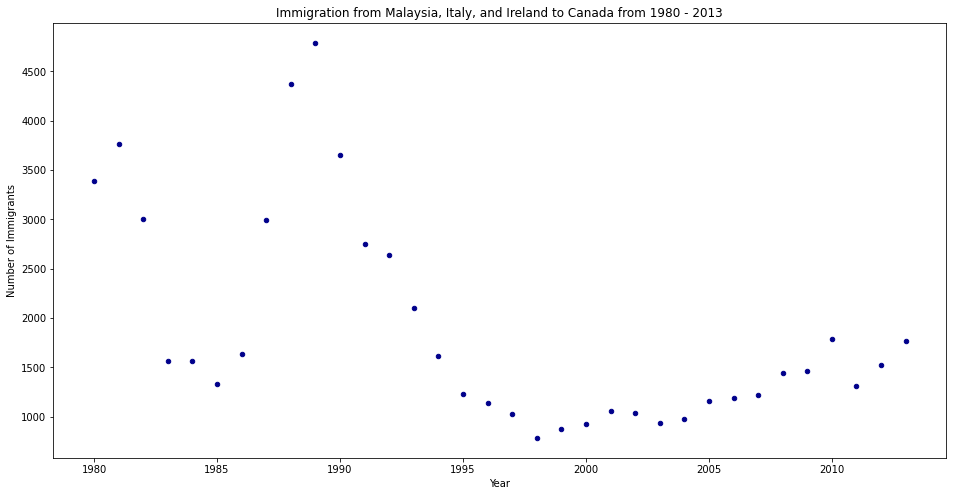

In [ ]:
# generate scatter plot
df_total.plot(kind='scatter', x='year', y='total', figsize=(16, 8), color='darkblue')

# add title and label to axes
plt.title('Immigration from Malaysia, Italy, and Ireland to Canada from 1980 - 2013')
plt.xlabel('Year')
plt.ylabel('Number of Immigrants')

plt.show()


- It is clear that the total number of immigrants experienced a Collapse with less than 500 immigrants in 1998. However, it has steadily gone up between 2000 and 2010. 



>**Bubble Plots**



- I will analyze the effect of **The Venezuelan crisis** on increasing the number of immigrants to Canada. 

- Venezuela suffers a great crisis during these years, which caused widespread people to continue to leave Venezuela to escape violence, insecurity, and threats as well as lack of food, medicine, and essential services. With over 6 million Venezuelan refugees and migrants worldwide, the vast majority in countries within Latin America and the Caribbean, this has become the second-largest external displacement crisis in the world.


- Let's analyze the effect of this crisis, and compare Colombia's immigration to that of it's neighbour Venezuela. Let's do that using a bubble plot of immigration from Venezuela and Colombia for the years 1980 - 2013. We will set the weights for the bubble as the normalized value of the population for each year.



- I will convert the Years to type int and include it in the dataframe.

In [ ]:
# transposed dataframe
df_t = df[years].transpose()

# cast the Years (the index) to type int
df_t.index = map(int, df_t.index)

# let's label the index. This will automatically be the column name when we reset the index
df_t.index.name = 'Year'

# reset index to bring the Year in as a column
df_t.reset_index(inplace=True)

# view the changes
df_t.head()

Country,Year,Palau,Western Sahara,Marshall Islands,New Caledonia,San Marino,American Samoa,Tuvalu,Sao Tome and Principe,Vanuatu,...,Poland,Republic of Korea,Sri Lanka,Iran (Islamic Republic of),United States of America,Pakistan,Philippines,United Kingdom of Great Britain and Northern Ireland,China,India
0,1980,0,0,0,0,1,0,0,0,0,...,863,1011,185,1172,9378,978,6051,22045,5123,8880
1,1981,0,0,0,0,0,1,1,0,0,...,2930,1456,371,1429,10030,972,5921,24796,6682,8670
2,1982,0,0,0,0,0,0,0,0,0,...,5881,1572,290,1822,9074,1201,5249,20620,3308,8147
3,1983,0,0,0,0,0,0,0,0,0,...,4546,1081,197,1592,7100,900,4562,10015,1863,7338
4,1984,0,0,0,0,0,0,1,0,0,...,3588,847,1086,1977,6661,668,3801,10170,1527,5704


- Now, I will create the normalized weights.

In [ ]:
# normalize Venezuela data
norm_Venezuela = (df_t['Venezuela (Bolivarian Republic of)'] - df_t['Venezuela (Bolivarian Republic of)'].min()) / (df_t['Venezuela (Bolivarian Republic of)'].max() - df_t['Venezuela (Bolivarian Republic of)'].min())

# normalize Colombia data
norm_Colombia = (df_t['Colombia'] - df_t['Colombia'].min()) / (df_t['Colombia'].max() - df_t['Colombia'].min())

To plot two different scatter plots in one plot, we can include the axes one plot into the other by passing it via the ax parameter.
We will also pass in the weights using the s parameter. Given that the normalized weights are between 0-1, they won't be visible on the plot. Therefore, we will:
multiply weights by 2000 to scale it up on the graph, and,
add 10 to compensate for the min value (which has a 0 weight and therefore scale with  
×
2000
 ).

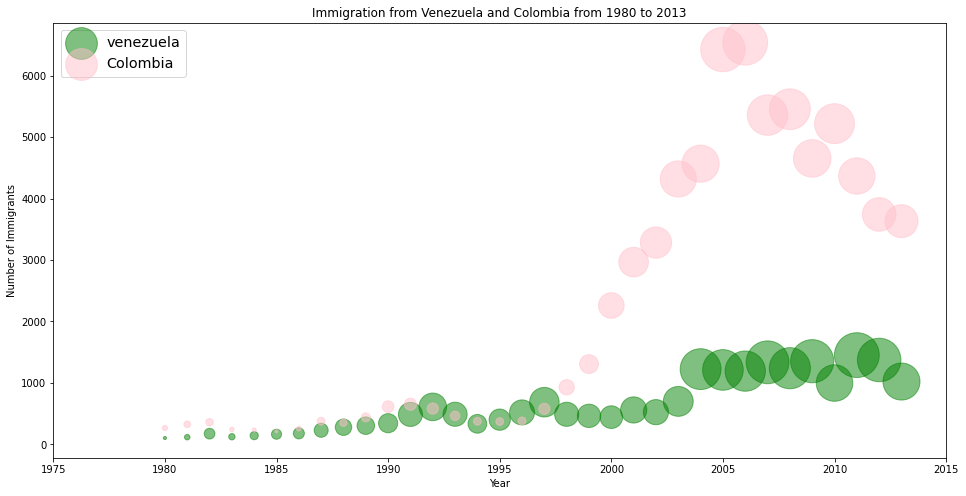

In [ ]:
# Venezuela
ax0 = df_t.plot(kind='scatter',
                    x='Year',
                    y='Venezuela (Bolivarian Republic of)',
                    figsize=(16, 8),
                    alpha=0.5,  # transparency
                    color='green',
                    s=norm_Venezuela * 2000 + 10,  # pass in weights 
                    xlim=(1975, 2015)
                    )

# Colombia
ax1 = df_t.plot(kind='scatter',
                    x='Year',
                    y='Colombia',
                    alpha=0.5,
                    color="pink",
                    s=norm_Colombia * 2000 + 10,
                    ax=ax0
                    )

ax0.set_ylabel('Number of Immigrants')
ax0.set_title('Immigration from Venezuela and Colombia from 1980 to 2013')
ax0.legend(['venezuela', 'Colombia'], loc='upper left', fontsize='x-large')

- The size of the bubble corresponds to the magnitude of immigrating population for that year, compared to the 1980 - 2013 data. The larger the bubble is, the more immigrants are in that year.

- From the plot above, we can see a corresponding increase in immigration from Venezuela during the 2000 - 2015 great crisis. Furthermore, due to the Colombian conflict, we can also observe a similar spike in the number of immigrants in Colombia after 2000.




>**Waffle Charts**

- I want to revisit the previous case study about 'Malaysia', 'Italy', and 'Ireland'.

In [ ]:
# let's create a new dataframe for these three countries 
df_MaItIr = df.loc[[ 'Malaysia', 'Italy', 'Ireland'], :]

# let's take a look at our dataframe
df_MaItIr

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Malaysia,Asia,South-Eastern Asia,Developing regions,786,816,813,448,384,374,425,...,593,580,600,658,640,802,409,358,204,24417
Italy,Europe,Southern Europe,Developed regions,1820,2057,1480,820,858,667,731,...,344,325,320,370,429,434,374,440,545,22624
Ireland,Europe,Northern Europe,Developed regions,781,895,707,298,327,287,481,...,224,283,300,412,395,547,525,725,1015,16964


- Waffle charts are not built into any of the Python visualization libraries. I will create them from scratch.

In [ ]:
# compute the proportion of each category with respect to the total
total_values = df_MaItIr['Total'].sum()
category_proportions = df_MaItIr['Total'] / total_values

# print out proportions
pd.DataFrame({"Category Proportion": category_proportions})

,Category Proportion
Country,
Malaysia,0.381486
Italy,0.353472
Ireland,0.265042


In [ ]:
# Defining the overall size of the waffle chart.
width = 40 # width of chart
height = 10 # height of chart

total_num_tiles = width * height # total number of tiles

print(f'Total number of tiles is {total_num_tiles}.')


Total number of tiles is 400.


In [ ]:
#Using the proportion of each category to determe it respective number of tiles
# compute the number of tiles for each category
tiles_per_category = (category_proportions * total_num_tiles).round().astype(int)

# print out number of tiles per category
pd.DataFrame({"Number of tiles": tiles_per_category})

,Number of tiles
Country,
Malaysia,153
Italy,141
Ireland,106


- Based on the calculated proportions, Malaysia will occupy 153 tiles of the waffle chart, Italy will occupy 141 tiles, and Irland will occupy 106 tiles.

In [ ]:
#Creating a matrix that resembles the waffle chart and populating it.
# initialize the waffle chart as an empty matrix
waffle_chart = np.zeros((height, width), dtype = np.uint)

# define indices to loop through waffle chart
category_index = 0
tile_index = 0

# populate the waffle chart
for col in range(width):
    for row in range(height):
        tile_index += 1

        # if the number of tiles populated for the current category is equal to its corresponding allocated tiles...
        if tile_index > sum(tiles_per_category[0:category_index]):
            # ...proceed to the next category
            category_index += 1       
            
        # set the class value to an integer, which increases with class
        waffle_chart[row, col] = category_index
        
print ('Waffle chart populated!')

Waffle chart populated!


In [ ]:
#take a peek at how the matrix looks like.
waffle_chart

array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2,
        2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3],
       [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

- As expected, the matrix consists of three categories and the total number of each category's instances matches the total number of tiles allocated to each category.

***Just a Note***

- *categories*: Unique categories or classes in dataframe.
- *values*: Values corresponding to categories or classes.
- *height*: Defined height of waffle chart.
- *width*: Defined width of waffle chart.
- *colormap*: Colormap class
- *value_sign*: In order to make our function more generalizable, we will add this parameter to address signs that could be associated with a value such as %, $, and so on. value_sign has a default value of empty string.


In [ ]:
def create_waffle_chart(categories, values, height, width, colormap, value_sign=''):

    # compute the proportion of each category with respect to the total
    total_values = sum(values)
    category_proportions = [(float(value) / total_values) for value in values]

    # compute the total number of tiles
    total_num_tiles = width * height # total number of tiles
    print ('Total number of tiles is', total_num_tiles)
    
    # compute the number of tiles for each catagory
    tiles_per_category = [round(proportion * total_num_tiles) for proportion in category_proportions]

    # print out number of tiles per category
    for i, tiles in enumerate(tiles_per_category):
        print (df_MaItIr.index.values[i] + ': ' + str(tiles))
    
    # initialize the waffle chart as an empty matrix
    waffle_chart = np.zeros((height, width))

    # define indices to loop through waffle chart
    category_index = 0
    tile_index = 0

    # populate the waffle chart
    for col in range(width):
        for row in range(height):
            tile_index += 1

            # if the number of tiles populated for the current category 
            # is equal to its corresponding allocated tiles...
            if tile_index > sum(tiles_per_category[0:category_index]):
                # ...proceed to the next category
                category_index += 1       
            
            # set the class value to an integer, which increases with class
            waffle_chart[row, col] = category_index
    
    # instantiate a new figure object
    fig = plt.figure()

    # use matshow to display the waffle chart
    colormap = plt.cm.coolwarm
    plt.matshow(waffle_chart, cmap=colormap)
    plt.colorbar()

    # get the axis
    ax = plt.gca()

    # set minor ticks
    ax.set_xticks(np.arange(-.5, (width), 1), minor=True)
    ax.set_yticks(np.arange(-.5, (height), 1), minor=True)
    
    # add dridlines based on minor ticks
    ax.grid(which='minor', color='w', linestyle='-', linewidth=2)

    plt.xticks([])
    plt.yticks([])

    # compute cumulative sum of individual categories to match color schemes between chart and legend
    values_cumsum = np.cumsum(values)
    total_values = values_cumsum[len(values_cumsum) - 1]

    # create legend
    legend_handles = []
    for i, category in enumerate(categories):
        if value_sign == '%':
            label_str = category + ' (' + str(values[i]) + value_sign + ')'
        else:
            label_str = category + ' (' + value_sign + str(values[i]) + ')'
            
        color_val = colormap(float(values_cumsum[i])/total_values)
        legend_handles.append(mpatches.Patch(color=color_val, label=label_str))

    # add legend to chart
    plt.legend(
        handles=legend_handles,
        loc='lower center', 
        ncol=len(categories),
        bbox_to_anchor=(0., -0.2, 0.95, .1)
    )
    plt.show()

Total number of tiles is 400
Malaysia: 153
Italy: 141
Ireland: 106


<Figure size 432x288 with 0 Axes>

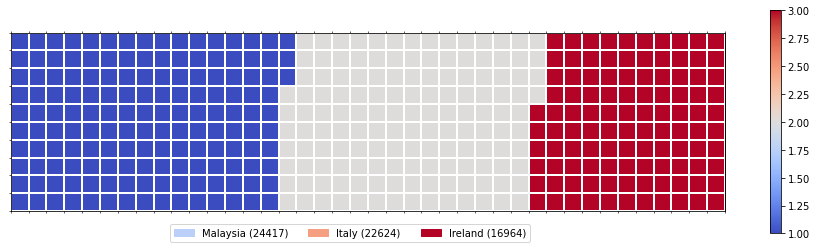

In [ ]:
#Let's define the input parameters:
width = 40 # width of chart
height = 10 # height of chart

categories = df_MaItIr.index.values # categories
values = df_MaItIr['Total'] # correponding values of categories

colormap = plt.cm.coolwarm # color map class

create_waffle_chart(categories, values, height, width, colormap)

>**Regression Plots**
- (I have already installed 'seaborn').

In [ ]:
# we can use the sum() method to get the total population per year
df_tot = pd.DataFrame(df[years].sum(axis=0))

# change the years to type float (useful for regression later on)
df_tot.index = map(float, df_tot.index)

# reset the index to put in back in as a column in the df_tot dataframe
df_tot.reset_index(inplace=True)

# rename columns
df_tot.columns = ['year', 'total']

# view the final dataframe
df_tot.head()

,year,total
0,1980.0,99137
1,1981.0,110563
2,1982.0,104271
3,1983.0,75550
4,1984.0,73417


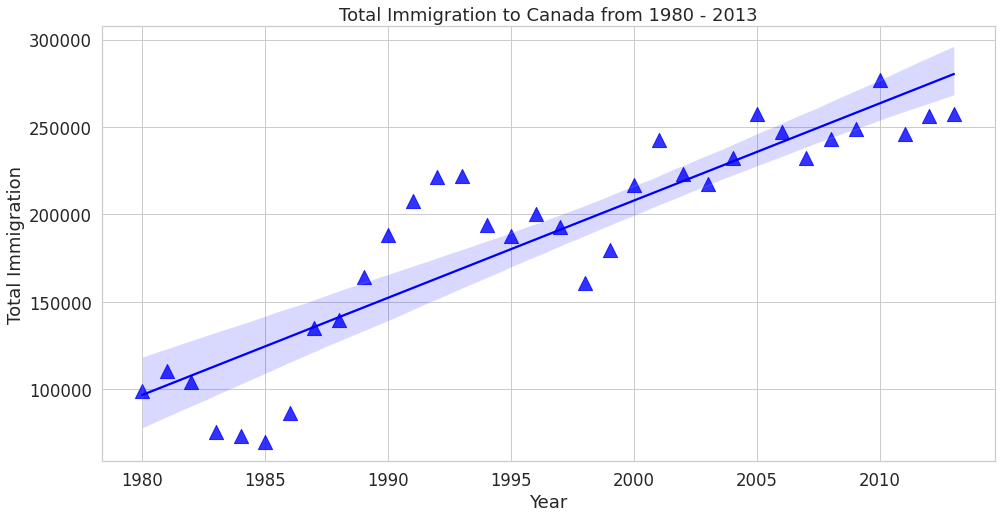

In [ ]:
#With seaborn, generating a regression plot is as simple as calling the regplot function.
plt.figure(figsize=(16, 8))
sns.set(font_scale=1.5)

sns.set_style('whitegrid')  #change background to white background with gridlines.
#or 
#sns.set_style('ticks')  # change background to white background

ax= sns.regplot(x='year', y='total', data=df_tot, color='blue', marker='^', scatter_kws={'s': 200})

ax.set(xlabel='Year', ylabel='Total Immigration') # add x- and y-labels
ax.set_title('Total Immigration to Canada from 1980 - 2013') # add title
plt.show()


- NOW, I am going to use seaborn to create a scatter plot with a regression line to visualize the total immigration from 'China', 'India', and 'Colombia' to Canada from 1980 to 2013.

Text(0.5, 1.0, 'Total Immigrationn from China, India, and Colombia to Canada from 1980 - 2013')

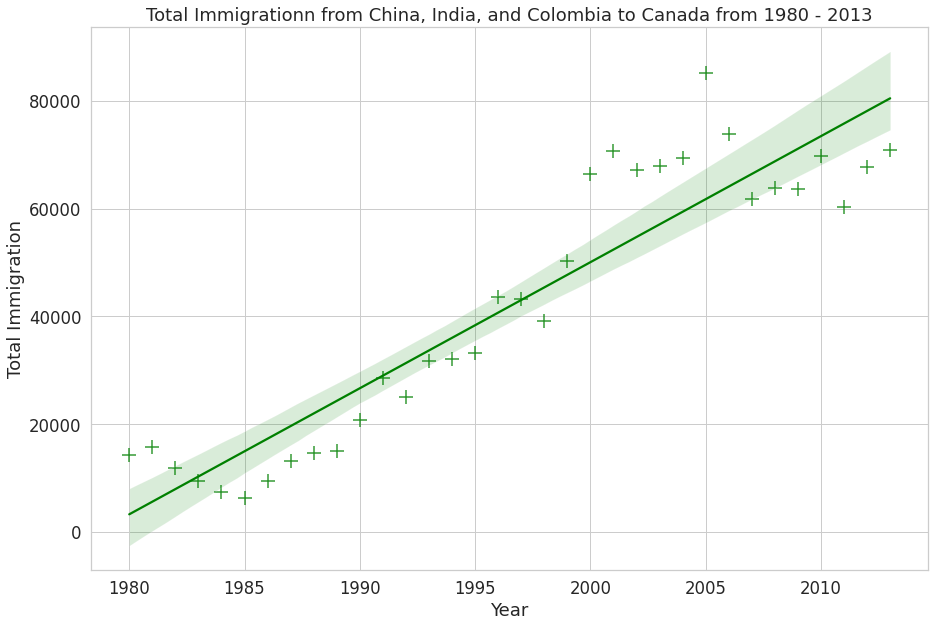

In [ ]:
 # create df_countries dataframe
df_countries = df.loc[['China', 'India','Colombia'], years].transpose()

# create df_total by summing across three countries for each year
df_total = pd.DataFrame(df_countries.sum(axis=1))

# reset index in place
df_total.reset_index(inplace=True)

# rename columns
df_total.columns = ['year', 'total']

# change column year from string to int to create scatter plot
df_total['year'] = df_total['year'].astype(int)

# define figure size
plt.figure(figsize=(15, 10))

# define background style and font size
sns.set(font_scale=1.5)
sns.set_style('whitegrid')


ax = sns.regplot(x='year', y='total', data=df_total, color='green', marker='+', scatter_kws={'s': 200})
ax.set(xlabel='Year', ylabel='Total Immigration')
ax.set_title('Total Immigrationn from China, India, and Colombia to Canada from 1980 - 2013')